**Importing Necessary Libraries** **teks tebal**

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Warnings
import warnings
warnings.filterwarnings('ignore')

**Data Loading**

In [5]:
#Untuk Google Colab :
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/MyDrive/GoogleColab/Mall_Customers.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Mounted at /content/drive
Shape of the data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Duplicates check
df.duplicated().sum()

0

There are no duplicates in the data

In [7]:
# Data types check
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [8]:
# Numerical variable description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# Categorical variable description
df.Gender.value_counts()

,count
Gender,
Female,112
Male,88


The range of data can be observed to be reasonable

In [10]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


There are no missing values in the data

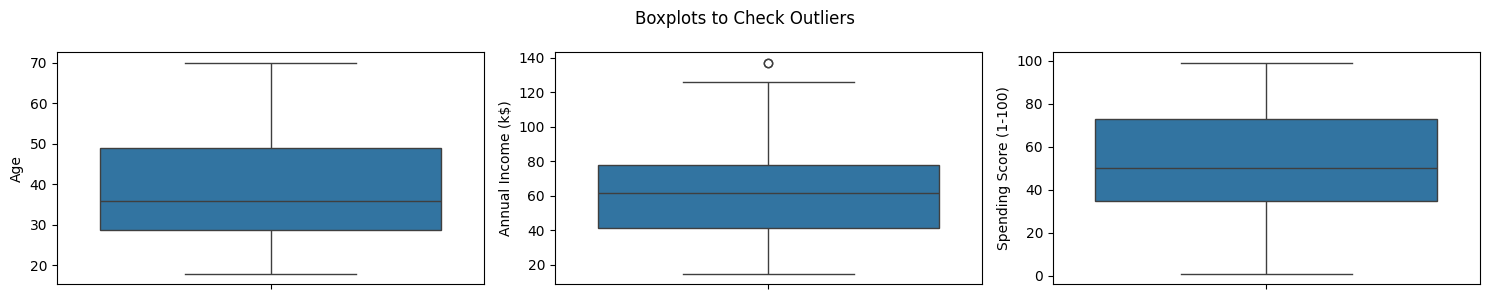

In [11]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

There are no significant outliers.
Considering all the above results, there is no need of data cleaning.

#Data Visualization

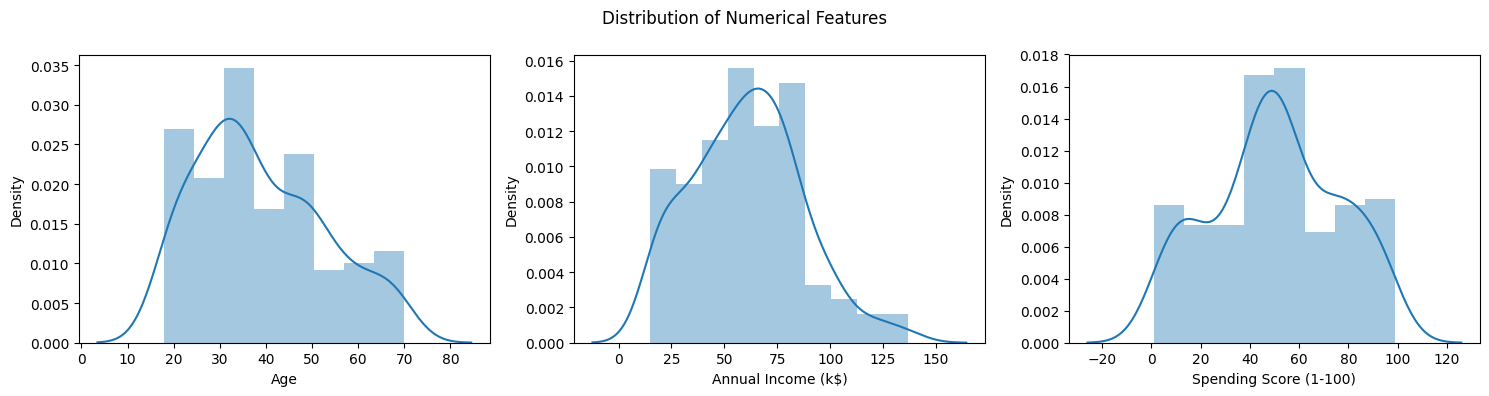

In [12]:
# Distribution of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

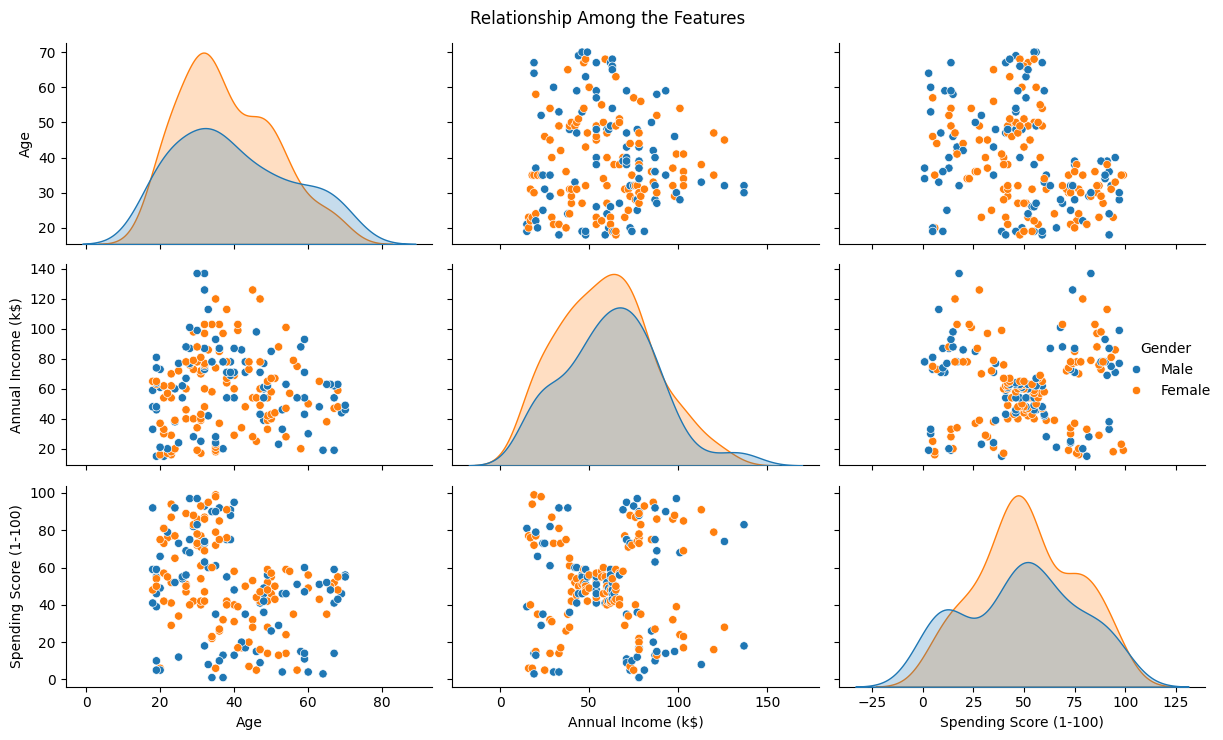

In [13]:
# Relationship among the features
sns.pairplot(df.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.suptitle('Relationship Among the Features')
plt.tight_layout()
plt.show()

#Data Preprocessing

In [14]:
# Feature Selection
df_fs = df.drop(columns='CustomerID')

# Label Encoding
df_encoded = df_fs.replace({'Gender': {'Female':0, 'Male':1}})

# Feature Scaling
#scaler = MinMaxScaler()
#X = scaler.fit_transform(df_encoded)
X = df_encoded

#Modeling

We will use K-Means Clustering and Hierarchical Clustering algorithms.

#K-Means Clustering

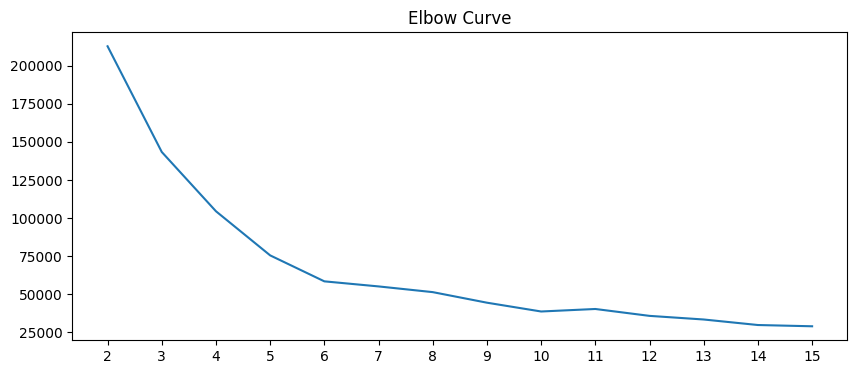

In [15]:
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

Considering the above elbow curve, 4 number of clusters will be an optimum choice.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Labeling the data
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_
print(df_kmeans.head())

# Calculate the Silhouette Score
score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", score)


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        3  
2        0  
3        3  
4        0  
Silhouette Score: 0.4067767360772861


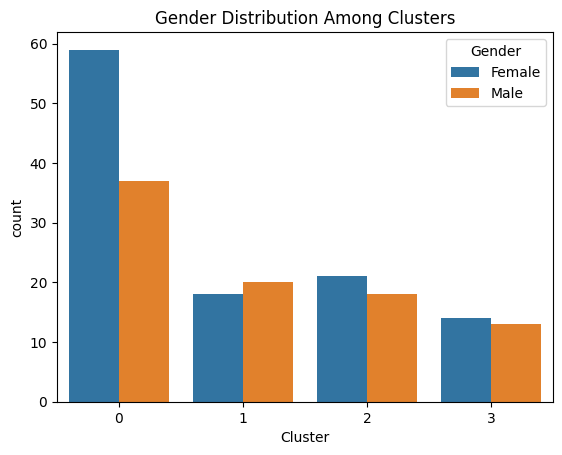

In [17]:
# Categorical variable distribution among clusters
sns.countplot(data=df_kmeans, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

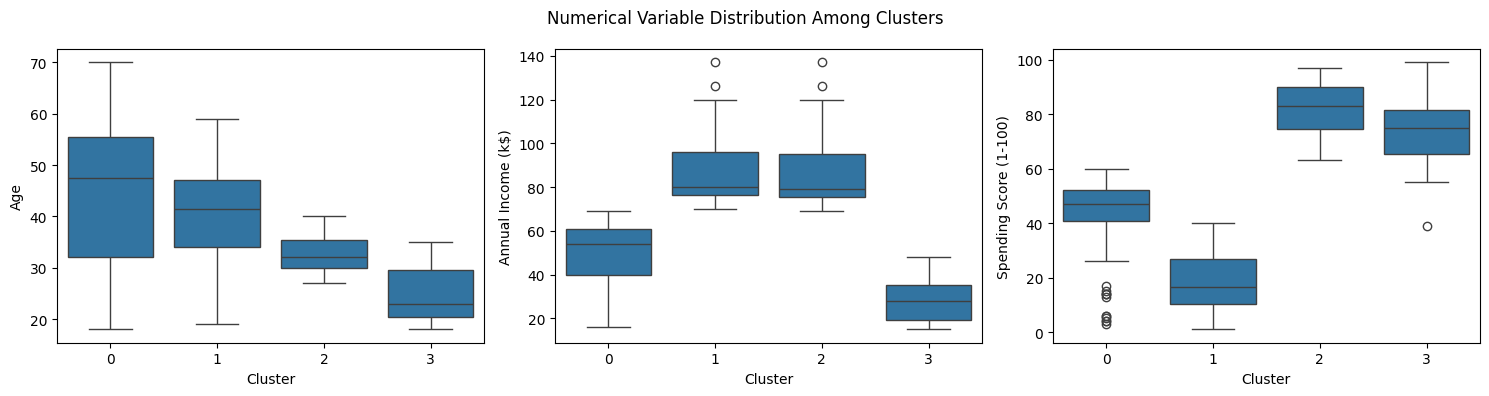

In [18]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

**Cluster Insights:**
All the clusters have almost identical annual income distributions. So, let us analyze customer clusters based on gender, age, and spending score.


*   Cluster 0: Low age customers with high spending score and low annual income
*   Cluster 1: Low age customers with high spending score and high annual income
*   Cluster 2: Medium age customer with low spending score and hight annual income
*   Cluster 3: High age customer with medium spending score and medium annual income



